# Description

* Visualize the population and density by zip code

Shape files source: https://simplemaps.com/data/us-zips

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
path = '../Data/demographics/population_by_zip.csv'
df = pd.read_csv(path)

array(['Dania', 'Hallandale', 'Hollywood', 'Pembroke Pines',
       'Pompano Beach', 'Coral Springs', 'Fort Lauderdale',
       'Deerfield Beach', 'Hialeah', 'Homestead', 'Opa Locka',
       'Miami Gardens', 'Miami', 'Miami Beach', 'Key Biscayne',
       'North Miami Beach'], dtype=object)

In [49]:
df['city'].unique()
df.dtypes

zip              int64
city            object
population       int64
density        float64
county_name     object
dtype: object

In [50]:
df.describe()

zip    population       density
count    133.000000    133.000000    133.000000
mean   33157.323308  31913.428571   2305.087218
std      107.001172  16299.575950   1795.028266
min    33004.000000      0.000000      0.000000
25%    33065.000000  18846.000000   1126.100000
50%    33147.000000  31257.000000   2188.700000
75%    33189.000000  43788.000000   2841.700000
max    33442.000000  72248.000000  14168.400000

# Zip Maps

### Florida

In [94]:
# helper functions

def heatmap(variable, map_df, title='', cmap='Blues', figsize=(10,6)):
    """ 
    Display a heatmap for the provided virable.
  
    Parameters: 
    variable (str): The name of the variable (column) in the map dataframe for which you want to display the heatmap.
    map_df (geopandas data frame): Map dataframe created using geopandas. 
    title (str): Optional title for the chart.
    cmap (str): Color for the heatmap
    figsize ((int,int)): Size of the figure.
    """
    
    # chloropleth range
    vmin, vmax = min(map_df[variable]), max(map_df[variable])
    
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=figsize)
    
    # create map
    map_df.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')
    
    # remove the axis
    ax.axis('off')

    # add a title
    ax.set_title(title, \
                  fontdict={'fontsize': '25',
                            'fontweight' : '3'})


    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)

In [53]:
path_fl = f'zip://../Data/maps/fl_zcta5.zip'
zipcode_gdf = gpd.read_file(path_fl)

In [54]:
zipcode_gdf.dtypes


OBJECTID         int64
STATEFP10       object
ZCTA5CE10       object
GEOID10         object
CLASSFP10       object
MTFCC10         object
FUNCSTAT10      object
ALAND10          int64
AWATER10         int64
INTPTLAT10      object
INTPTLON10      object
PARTFLG10       object
FGDLAQDATE      object
AUTOID           int64
geometry      geometry
dtype: object

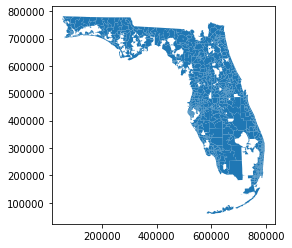

In [60]:
zipcode_gdf.plot()

### Miami-Dade and Broward Counties

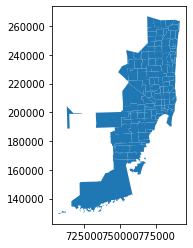

In [88]:
map_path = '../Data/maps/south_fl_zips'
map_df = gpd.read_file(map_path)
map_df = map_df.rename(columns={'ZCTA5CE10':'zip'})
map_df.plot()

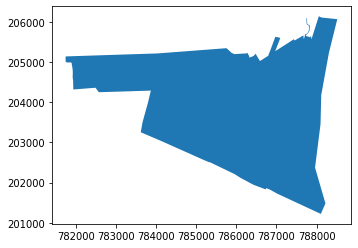

In [89]:
miami_beach =  map_df[map_df['zip'] == '33139']
miami_beach.plot()

In [90]:
# take the columns that we care about and cast zip to string to perform the join
pop_dens = df[['zip', 'population', 'density']]
pop_dens['zip'] = list(map(str,pop_dens['zip']))

# join geodataframe with demographic data
merged = map_df.set_index('zip').join(pop_dens.set_index('zip'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


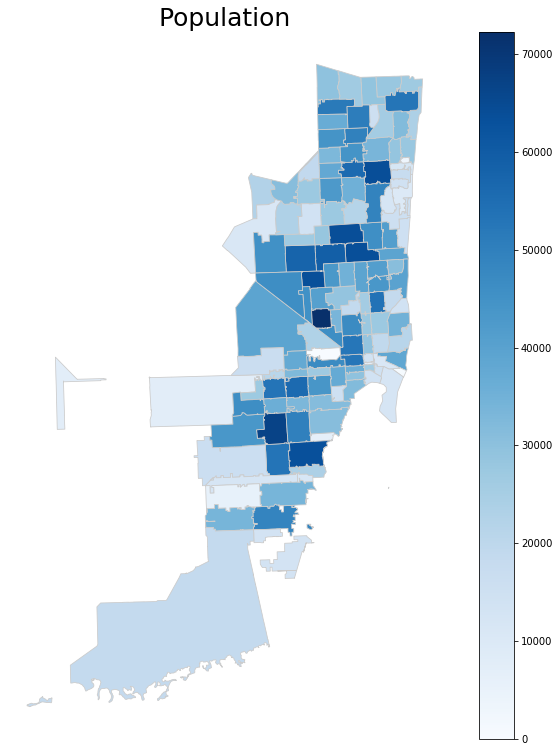

In [93]:
heatmap('population', merged, title='Population', figsize=(13, 13))

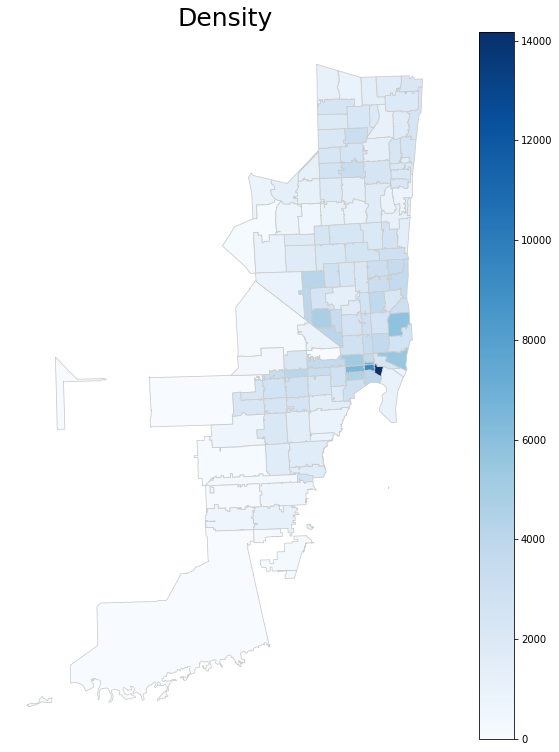

In [92]:
heatmap('density', merged, title='Density', figsize=(13, 13))